In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#-----

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_org = pd.read_csv(mouse_drug_data)
clinical_org = pd.read_csv(clinical_trial_data)

#-----

# Combine the data into a single dataset
mouse = mouse_org.copy()
clinical = clinical_org.copy()

data = pd.merge(clinical, mouse, on='Mouse ID', how='inner')

data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_resp = data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].groupby(['Drug', 'Timepoint']).mean().reset_index()

mean_tumor_resp.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_resp = data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].groupby(['Drug', 'Timepoint']).sem().reset_index()

sem_tumor_resp.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_resp2 = mean_tumor_resp.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

mean_tumor_resp2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


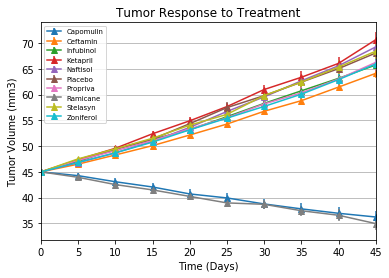

In [5]:
# Generate the Plot (with Error Bars)
sem_tumor_resp2 = sem_tumor_resp.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#-----

mean_tumor_resp2.plot(marker='^', yerr=sem_tumor_resp2)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best', fontsize='x-small')
plt.grid(axis='y')

plt.savefig('Tumor Response to Treatment.png')

plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = data[['Drug', 'Timepoint', 'Metastatic Sites']].groupby(['Drug', 'Timepoint']).mean()

mean_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site = data[['Drug', 'Timepoint', 'Metastatic Sites']].groupby(['Drug', 'Timepoint']).sem()

sem_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site2 = mean_met_site.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mean_met_site2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


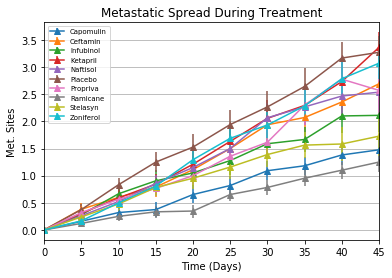

In [9]:
# Generate the Plot (with Error Bars)
sem_met_site2 = sem_met_site.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

#-----

mean_met_site2.plot(marker='^', yerr=sem_met_site2)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Met. Sites')
plt.legend(loc='best', fontsize='x-small')
plt.grid(axis='y')

plt.savefig('Metastatic Spread During Treatment')

plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = data[['Drug', 'Timepoint', 'Mouse ID']].groupby(['Drug', 'Timepoint']).count().reset_index().rename(columns={'Mouse ID':'Mouse Count'})

survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
survival2 = survival.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

survival2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


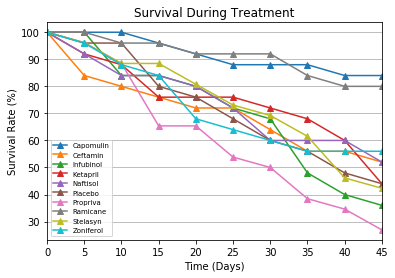

In [12]:
# Generate the Plot (Accounting for percentages)
(survival2 / survival2.iloc[0] * 100).plot(marker='^')

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='best', fontsize='x-small')
plt.grid(axis='y')

plt.savefig('Survival During Treatment.png')

plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
change = (mean_tumor_resp2.loc[45] - mean_tumor_resp2.loc[0])/mean_tumor_resp2.loc[0] * 100

change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

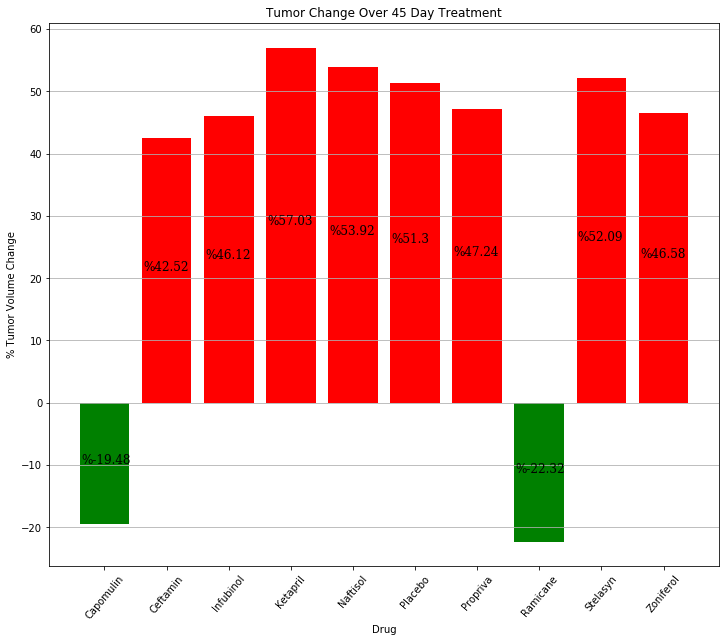

In [14]:
# selecting text style
font = {'family': 'serif', 'weight': 'normal', 'size': 12, 'color':'black'}

# colour coding
col = ['red' if x >= 0 else 'green' for x in change]

#-----

# building plot
plt.rcParams["figure.figsize"] = [12, 10]
plt.bar(mean_tumor_resp2.columns, change, color=col, label=mean_tumor_resp2.columns)
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
plt.grid(axis='y')
plt.xticks(list(range(10)), labels=mean_tumor_resp2.columns, rotation = 50)

# placing percentage labels
for i in range(0, 10, 1):
    plt.text(x=i-0.38, y=change[i]/2, s='%'+str(round(change[i], 2)), fontdict=font)
    
plt.rcParams["figure.figsize"] = [12, 10]

plt.savefig('Tumor Change Over 45 Day Treatment.png')

plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

# Analysis

Observable Trends:
    
    1) Capomulin and Ramicane appear to have significantly reduced tumor volume on average over the 45 day treatment
    
    2) Survival rates were noticably higher on average for mice treated with Capomulin and Ramicane
    
    3) All drugs on average inhibited metastatic spread relative to the placebo after 40 days, after which only Ketapril 
    failed to beat the placebo